In [2]:
!pip install quandl

    100% |████████████████████████████████| 51kB 3.6MB/s 
    100% |████████████████████████████████| 71kB 3.6MB/s 
  Running setup.py bdist_wheel for inflection ... - done
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/41/fa/e9/2995f4ab121e9f30f342fa2d43f0b27f851a0cb9f0d98d3b45
Successfully built inflection


0.996161296476 0.996221043365


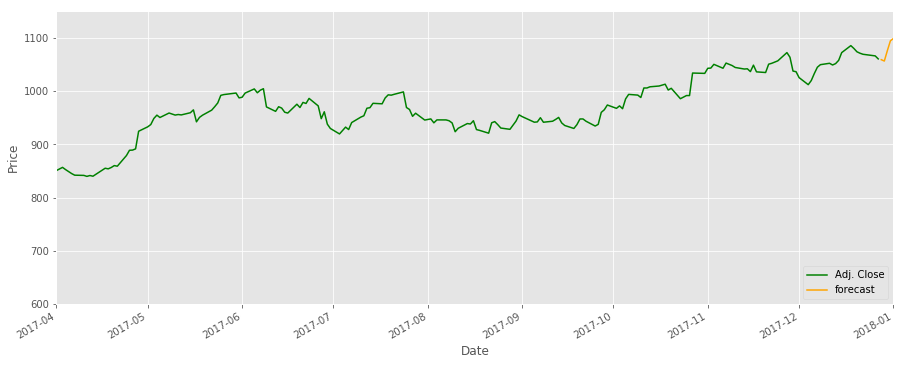

            Adj. Close    HL_PCT  PCT_CHNG  Adj. Volume    label     forecast
Date                                                                         
2017-12-13     1051.39  0.000085 -0.000007    1369580.0  1073.56          NaN
2017-12-14     1057.47  0.000128  0.000019    1531504.0  1070.85          NaN
2017-12-15     1072.00  0.000143  0.000077    3080738.0  1068.86          NaN
2017-12-18     1085.09  0.000151  0.000080    1482768.0  1065.85          NaN
2017-12-19     1079.78  0.000118 -0.000030    1287930.0  1060.20          NaN
2017-12-20     1073.56  0.000118 -0.000068    1429035.0  1055.95          NaN
2017-12-21     1070.85  0.000080 -0.000042    1211012.0  1053.40          NaN
2017-12-22     1068.86  0.000038 -0.000011     860800.0  1073.21          NaN
2017-12-26     1065.85  0.000097 -0.000026     914574.0  1091.52          NaN
2017-12-27     1060.20  0.000093 -0.000060    1027634.0  1095.76          NaN
2017-12-28         NaN       NaN       NaN          NaN      NaN

In [9]:
import pandas as pd
import numpy as np
import quandl, math
import datetime
# Machine Learning
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#Visualization
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns

quandl.ApiConfig.api_key = 'q-UWpMLYsWKFejy5y-4a'
df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open','Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low'])/(df['Adj. Low']*100)
df['PCT_CHNG'] = (df['Adj. Close'] - df['Adj. Open'])/(df['Adj. Open']*100)
df = df[['Adj. Close', 'HL_PCT', 'PCT_CHNG', 'Adj. Volume']]

forecast_col = 'Adj. Close'
forecast_out = int(5)
df['label'] = df[forecast_col].shift(-forecast_out)
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_forecast_out = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['label'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = cross_validation.train_test_split( X, y, test_size=0.2)
lm = LinearRegression()
lm.fit(X_train, y_train)

accuracy1= lm.score(X_train, y_train)
accuracy = lm.score(X_test, y_test)
print(accuracy,accuracy1)
y_train_predict=lm.predict(X_train)
y_test_predict=lm.predict(X_test)
# bat dau du doan
forecast_prediction = lm.predict(X_forecast_out)# bước tiến sơ cấp ví như các giọt axit-amin, mầm móng sự sóng
#nó học từ mô hình phía trên bằng cách tính đường phù hợp giữa 2 biến X và y, sau đó tự dự đoán 
df.dropna(inplace=True)
df['forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_prediction:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(5)]+[i] # i lấy từng cái 1 của forecast_prediction cho vào cột forecast
                                                       #bắt đầu từ đoạn 2017-12-27 thả vào NaN 5 hàng chạy theo i là 5 cho hết vòng lặp
df['Adj. Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="orange")
plt.xlim(xmin=datetime.date(2017, 4, 1))
plt.ylim(ymin=600)
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
print( df.tail(15))
print( forecast_prediction)
print( df.head(2))


In [1]:
# sau khi dropna(inplace=True)
# chức năng:
# bỏ qua tại vị trí từ 2017-12-26 đến 2018-01-03 vì NaN
# số bên 'label' không giống với 'Adj.close',dẫn đến ghép nối ko liên quan
# mục đích:cắt ngay tại vị trí 2017-12-26 , bắt cầu cho df['forecast'] dẫn đường cho df.loc[next_date] để dự đoán.

            Adj. Close    HL_PCT  PCT_CHNG  Adj. Volume    label
Date                                                            
2017-12-05     1019.60  0.000343  0.000085    1927802.0  1048.77
2017-12-06     1032.72  0.000239  0.000159    1369276.0  1051.39
2017-12-07     1044.57  0.000131  0.000082    1437448.0  1057.47
2017-12-08     1049.38  0.000101 -0.000023    1479665.0  1072.00
2017-12-11     1051.97  0.000114  0.000008    1096997.0  1085.09
2017-12-12     1048.77  0.000169 -0.000012    1684977.0  1079.78
2017-12-13     1051.39  0.000085 -0.000007    1369580.0  1073.56
2017-12-14     1057.47  0.000128  0.000019    1531504.0  1070.85
2017-12-15     1072.00  0.000143  0.000077    3080738.0  1068.86
2017-12-18     1085.09  0.000151  0.000080    1482768.0  1065.85
2017-12-19     1079.78  0.000118 -0.000030    1287930.0  1060.20
2017-12-20     1073.56  0.000118 -0.000068    1429035.0  1055.95
2017-12-21     1070.85  0.000080 -0.000042    1211012.0  1053.40
2017-12-22     1068.86  0.000038 -0.000011     860800.0  1073.21
2017-12-26     1065.85  0.000097 -0.000026     914574.0  1091.52



SyntaxError: invalid token (<ipython-input-1-d7afce2c6997>, line 2)

In [49]:
X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = cross_validation.train_test_split( X, y, test_size=0.2)
lm = LinearRegression()
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

print('MSE train: %.2f, test: %.2f' % (
                mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (
                r2_score(y_train, y_train_pred),
                r2_score(y_test, y_test_pred)))


MSE train: 1215.83, test: 1166.24
R^2 train: 0.98, test: 0.98


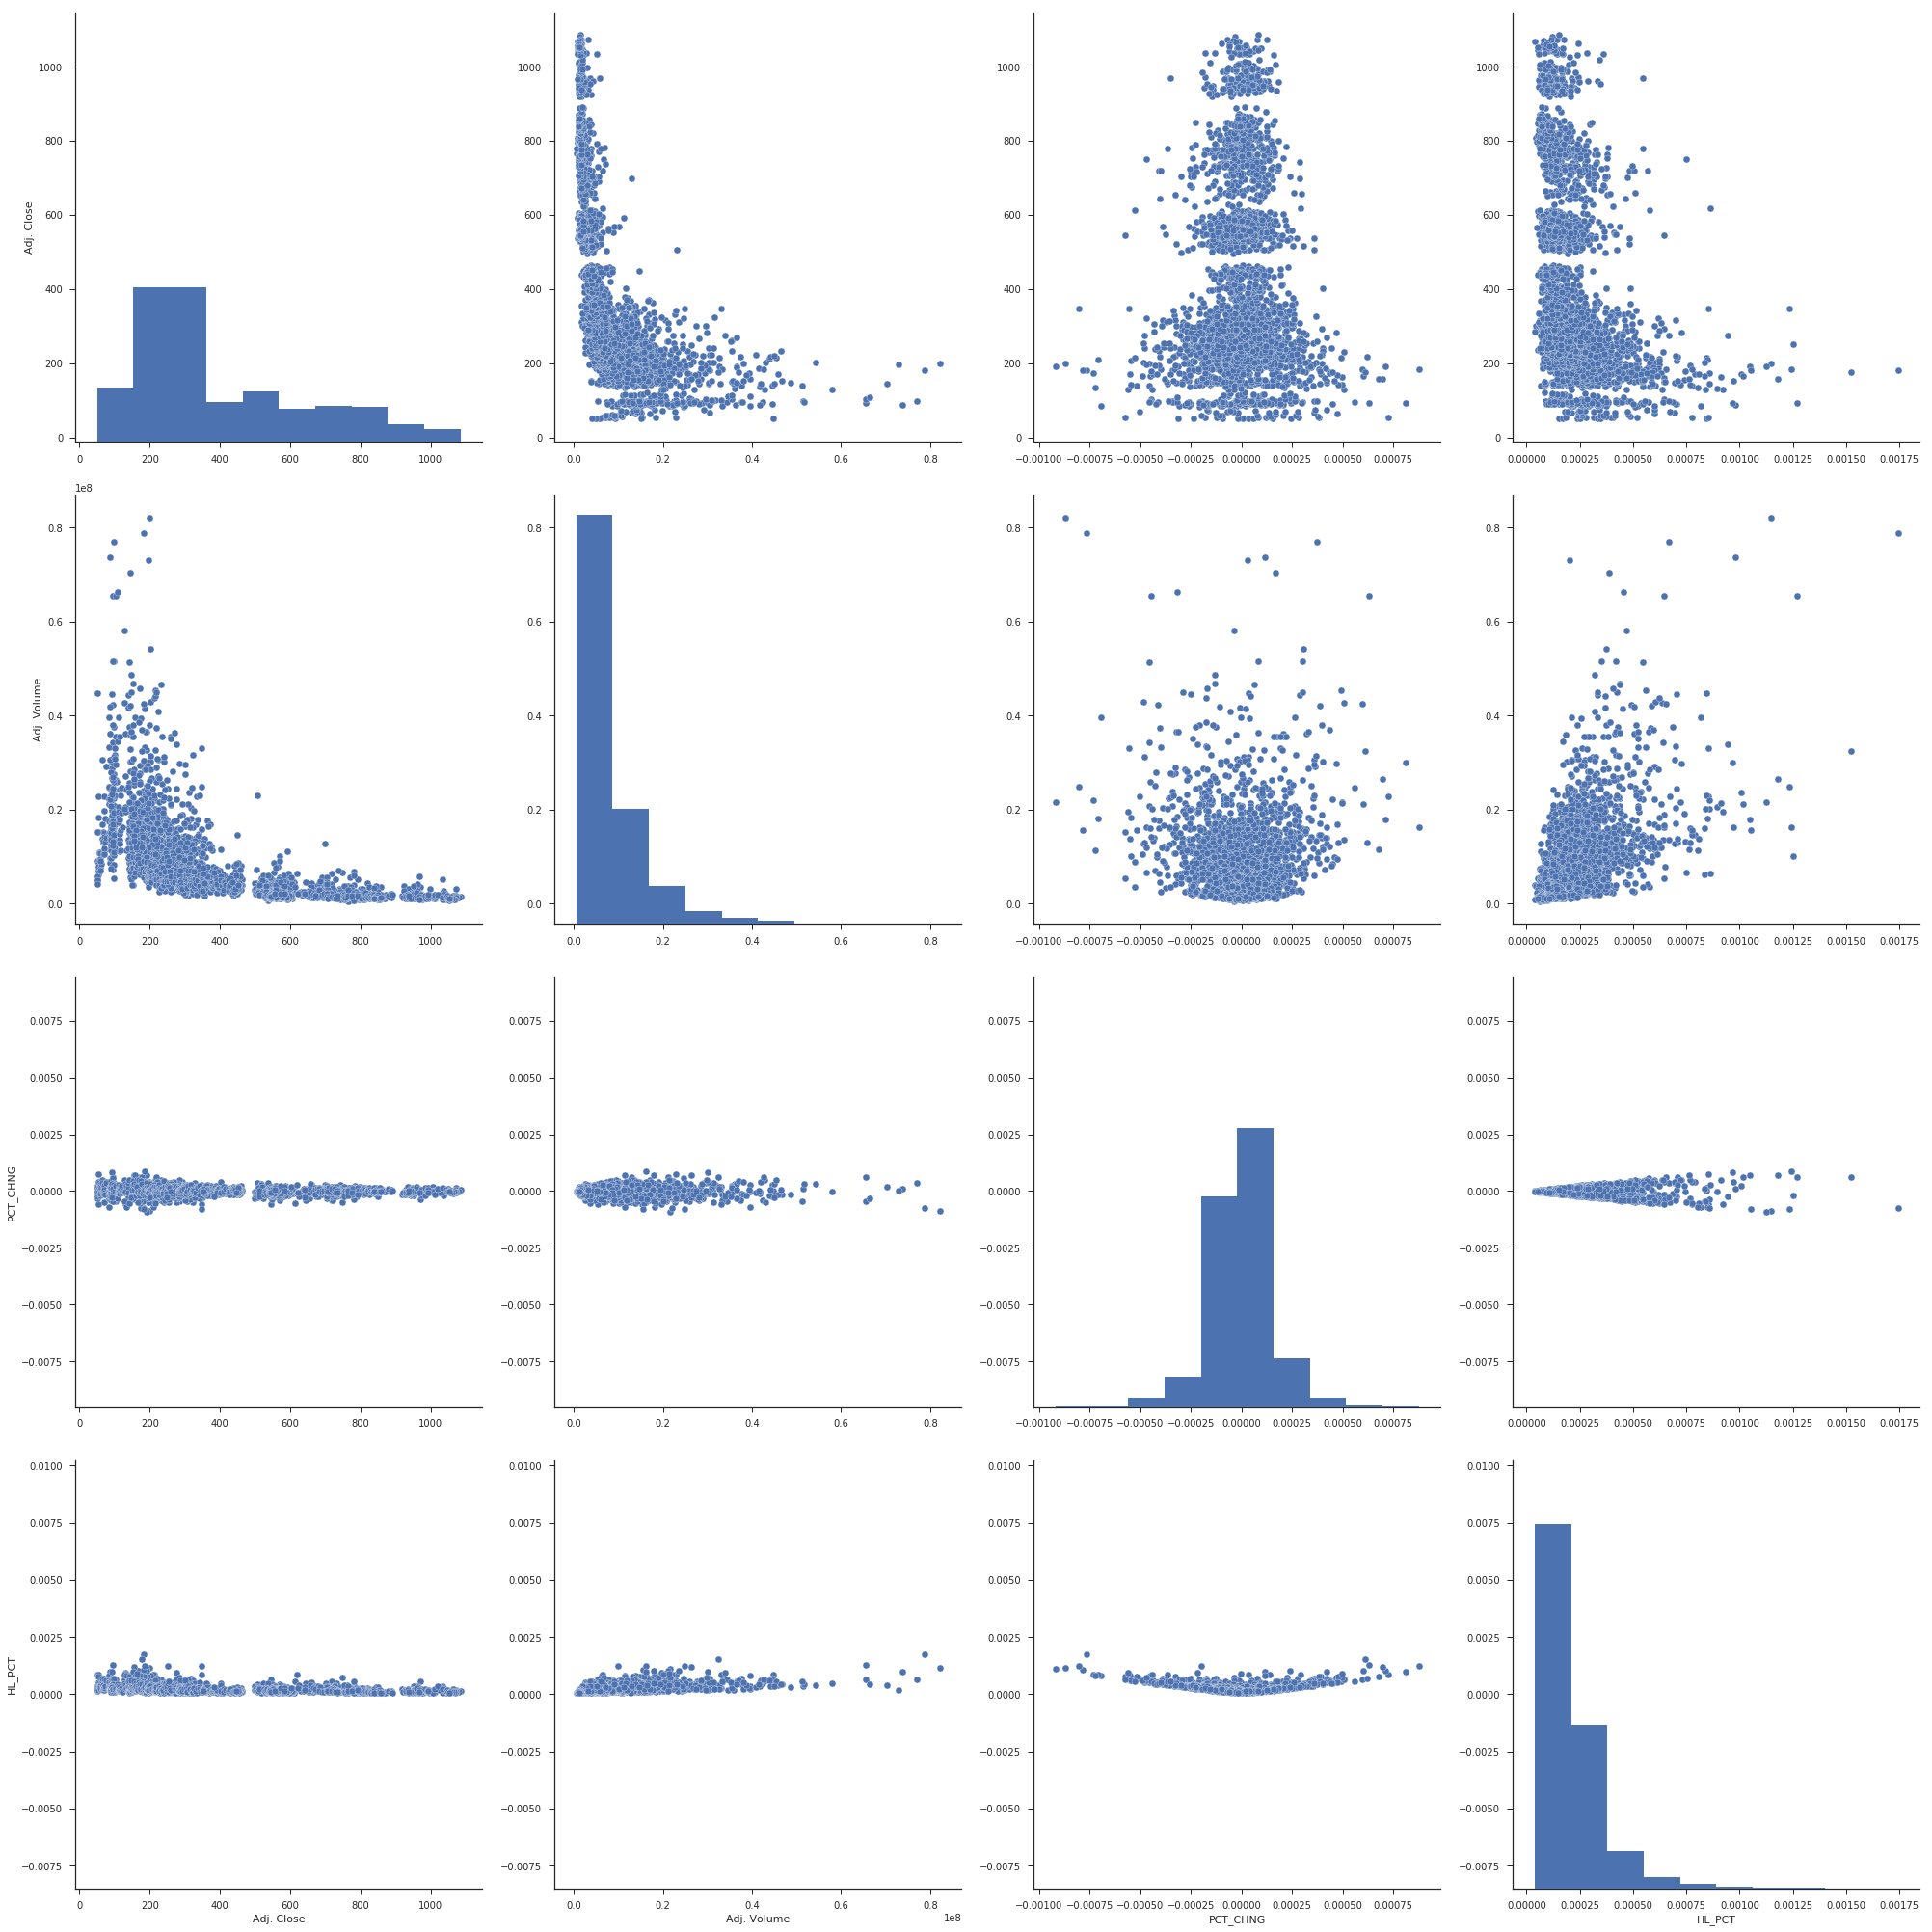

In [96]:
sns.set(style='ticks')
cot= ['Adj. Close', 'Adj. Volume', 'PCT_CHNG','HL_PCT' ]
sns.pairplot(df[cot], size=7)
plt.tight_layout()
plt.savefig('fig-housing-pairwise-dist.png')
plt.show()



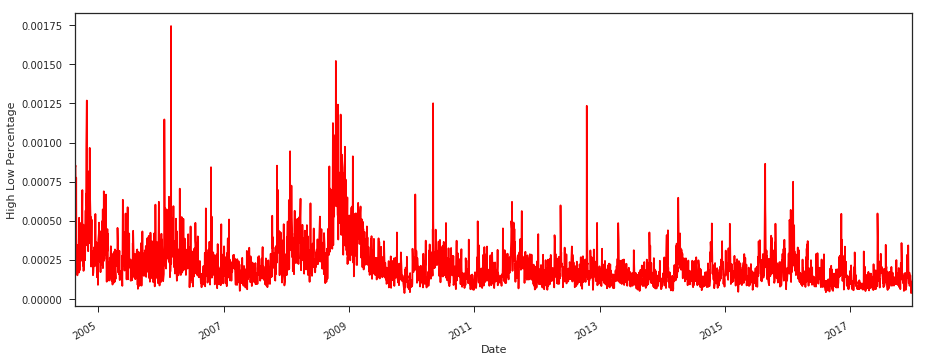

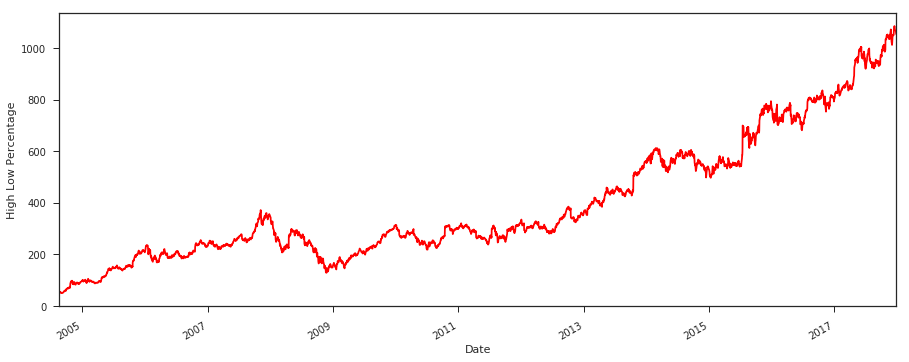

In [98]:
df['HL_PCT'].plot(figsize=(15,6), color="red")
plt.xlabel('Date')
plt.ylabel('High Low Percentage')
plt.show()

df['Adj. Close'].plot(figsize=(15,6), color="red")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

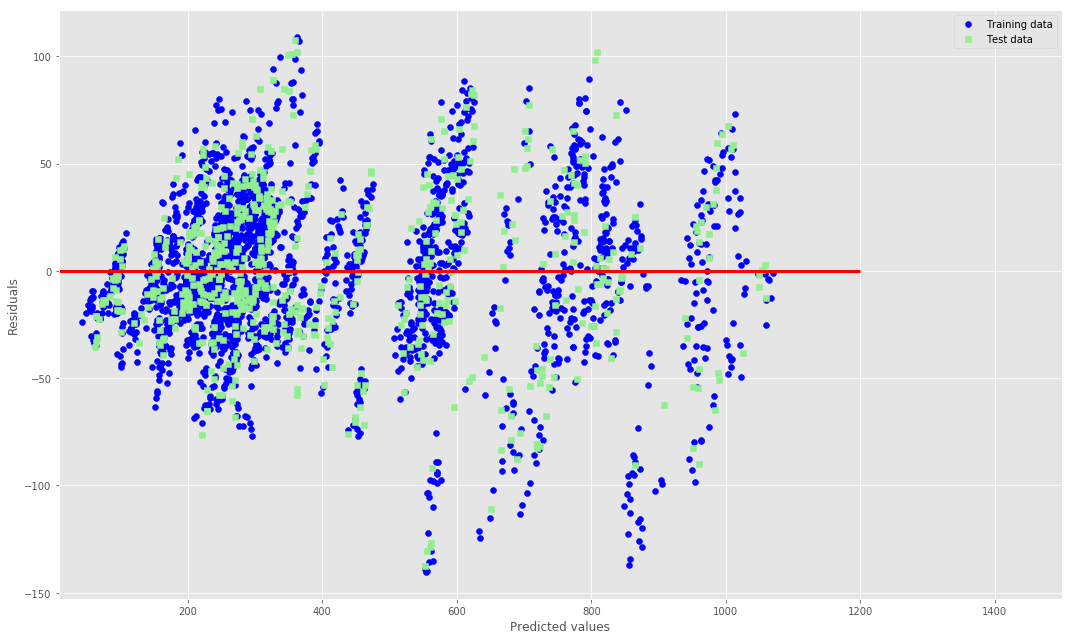

In [18]:
width = 15
height = 9
plt.figure(figsize=(width, height))

plt.scatter(y_train_pred,  y_train_pred - y_train,   c='blue', marker='o', label='Training data') 
      
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')


plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=0, xmax=1200.000, lw=3, color='red')
plt.xlim([8, 1500])
plt.tight_layout()
plt.savefig('fig-housing-pairwise-dist.png', dpi=300)
plt.show()

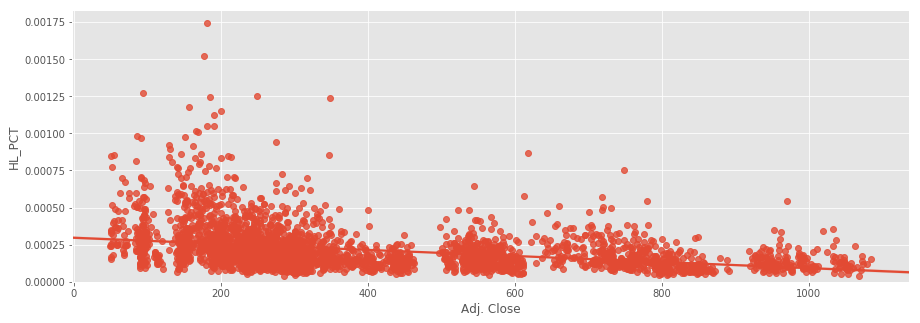

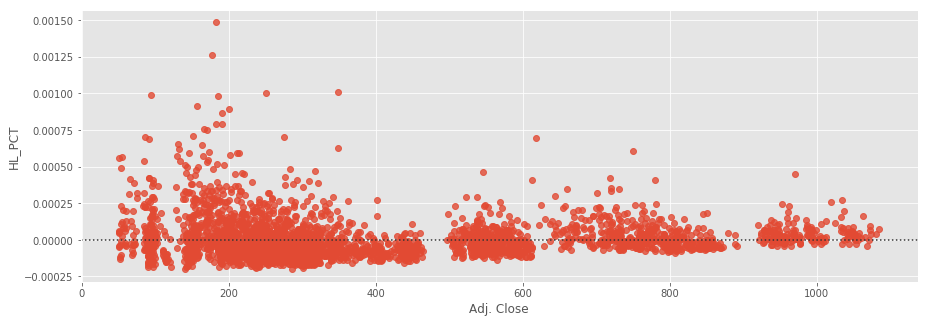

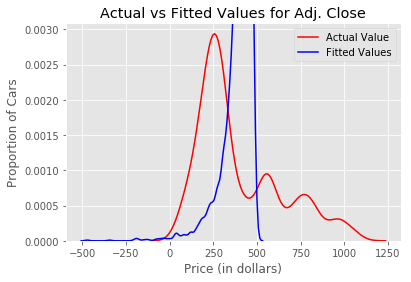

R^2 : -527891964565127697230165180416.00


In [42]:
width = 15
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x='Adj. Close', y='HL_PCT', data=df)
plt.ylim(0,)
plt.show()

plt.figure(figsize=(width, height))
sns.residplot( df['Adj. Close'],df['HL_PCT'])
plt.show()


ax1 = sns.distplot(df['Adj. Close'], hist=False, color="r", label="Actual Value")
sns.distplot( Yhat , hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Adj. Close')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()



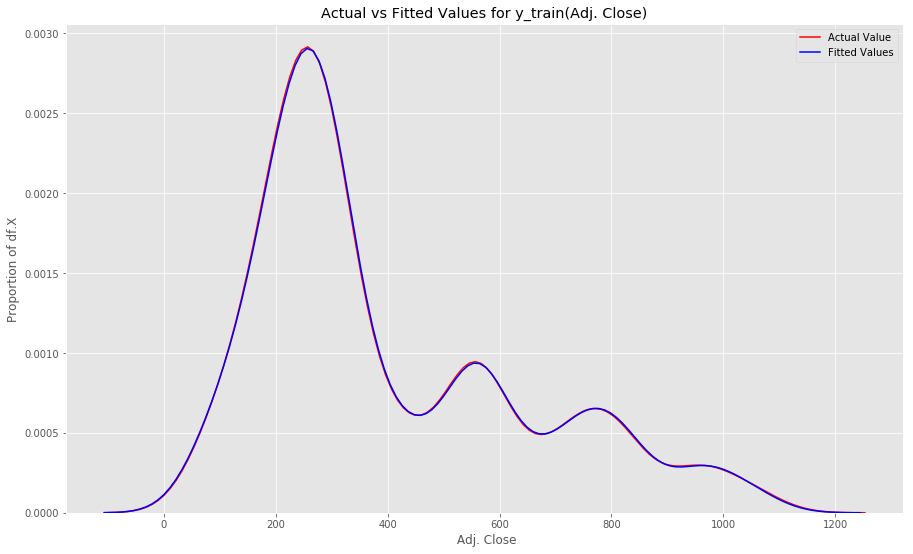

In [13]:
width = 15
height = 9
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot( y_train_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for y_train(Adj. Close)')
plt.xlabel(' Adj. Close')
plt.ylabel('Proportion of df.X')
plt.show()

